##Prediction of the Strength of Reinforced Concrete Beams

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge

In [3]:
# Defining custom parameters
root_dir = '###'

In [21]:
# Importing the dataset
df_train = pd.read_excel(f'{root_dir}/BeamLoad.xlsx', sheet_name = 'Train')
df_test = pd.read_excel(f'{root_dir}/BeamLoad.xlsx', sheet_name = 'Test')
df_validate = pd.read_excel(f'{root_dir}/BeamLoad.xlsx', sheet_name = 'Validate')

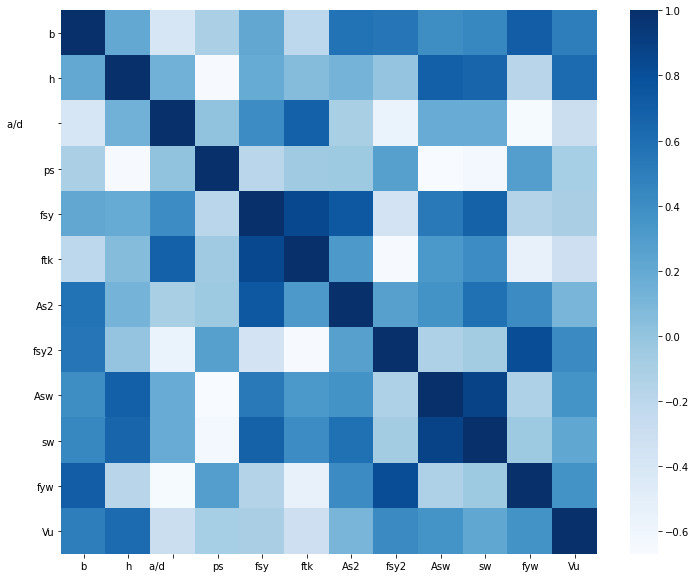

In [22]:
# Visualizing the correlation
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(data = df_train.corr(), cmap = 'Blues')

In [23]:
# Defining the features and targets
X_train = df_train.iloc[: , :-1].values
y_train = df_train.iloc[: , -1].values
X_test = df_test.iloc[: , :-1].values
y_test = df_test.iloc[: , -1].values
X_validate = df_validate.iloc[: , :-1].values
y_validate = df_validate.iloc[: , -1].values

In [30]:
reg = Ridge(alpha = 2.410, random_state = 50)
reg.fit(X_train, y_train)
trainscore = reg.score(X_train, y_train)
testscore = reg.score(X_test, y_test)
validatescore = reg.score(X_validate, y_validate)
print('Test Set Results:\nActual vs Predicted')
for i in range(len(X_test)):
    print(f'{y_test[i]}\t{reg.predict(X_test)[i]}')
print('\nValidation Set Results:\nActual vs Predicted')
for i in range(len(X_validate)):
    print(f'{y_validate[i]}\t{reg.predict(X_validate)[i]}')
print('\nModel Evaluation:')
print(f'Training Accuracy : {trainscore}\nTest Accuracy : {testscore}\nValidation Accuracy : {validatescore}')

Test Set Results:
Actual vs Predicted
229.26	230.33077861236052
210.08	213.220865321902
193.54	203.84979476340516
228.92	231.83528505394167
208.36	215.2895616790761
192.87	206.29461773097455

Validation Set Results:
Actual vs Predicted
159.56	160.32772412901318
146.52	143.21781083855456
136.92	133.6179280303012

Model Evaluation:
Training Accuracy : 0.8828904470906505
Test Accuracy : 0.7264923369841649
Validation Accuracy : 0.9132742690126813
